## Prediction of Adult Income Based on Census Data

### Introduction

Income prediction is a common application of data analytics that leverages demographic, educational, and employment-related data to estimate an individual’s earning potential. The UCI Adult Census dataset provides a rich set of features — such as age, education, marital status, occupation, hours worked per week, and capital gains — that can be used to predict whether an individual earns more than $50K per year.
By applying data cleaning, exploratory data analysis, and machine learning techniques, this project not only builds a predictive model but also identifies the most significant factors influencing income levels. Such insights are valuable for workforce analytics, targeted marketing, and policy-making.

### Objective

To build and evaluate machine learning models that classify individuals into two income categories — ≤$50K and > $50K — using demographic and work-related features.
The specific goals are to:
- Clean and preprocess the Adult Census dataset for accurate analysis.
- Explore the relationship between socio-economic factors and income.
- Compare multiple machine learning models to select the best-performing one.
- Identify the key features that most strongly influence income prediction.

### Hypothesis

1. Education Level Hypothesis:
Individuals with higher education (e.g., Bachelor’s degree or above) are more likely to earn > $50K compared to those with lower education levels.

2. Work Hours Hypothesis:
Individuals working more hours per week are more likely to earn > $50K.

3. Capital Gains Hypothesis:
Individuals with higher capital gains are more likely to have incomes > $50K.

4. Marital Status Hypothesis:
Married individuals, particularly those in dual-income households, are more likely to earn > $50K.

5. Age Hypothesis:
Middle-aged individuals (30–50 years old) are more likely to be in the higher-income group compared to younger or older individuals.

In [1]:
# Step 1 : import required libararies
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 2 : Load Dataset
df = pd.read_csv('adult.csv')
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Step 3: Dataset Overview
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Data Preprocessing
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Standerdizing missing markers
df[df == '?'] = np.nan
df.head()

df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [7]:
# Handling Missing Values : Imputation
for col in ['workclass', 'occupation', 'native.country']:
  df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


Used EDA (Exploratory Data Analysis) because it’s the first deep look at the dataset before modeling, and it helps us understand the data, detect problems, and choose the right preprocessing/modeling steps.

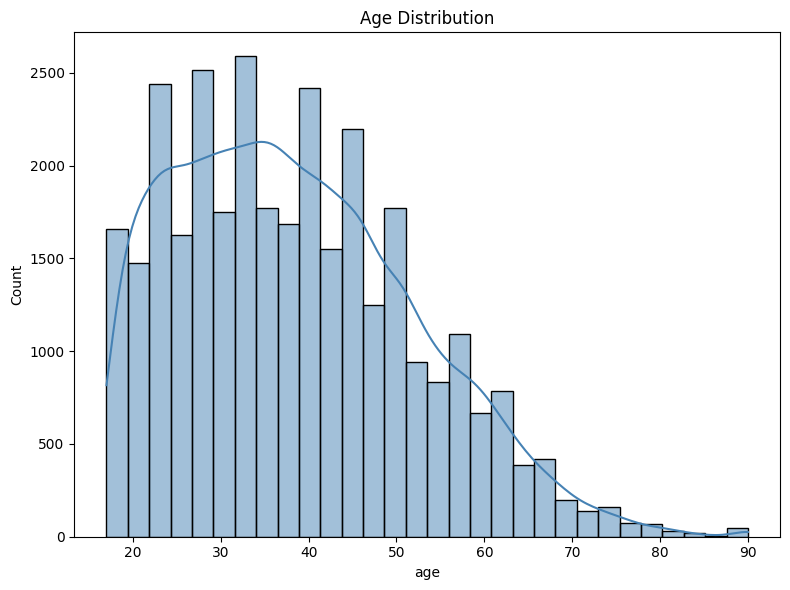

In [8]:
# EDA
# 1) Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=30, kde=True, color="steelblue")
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


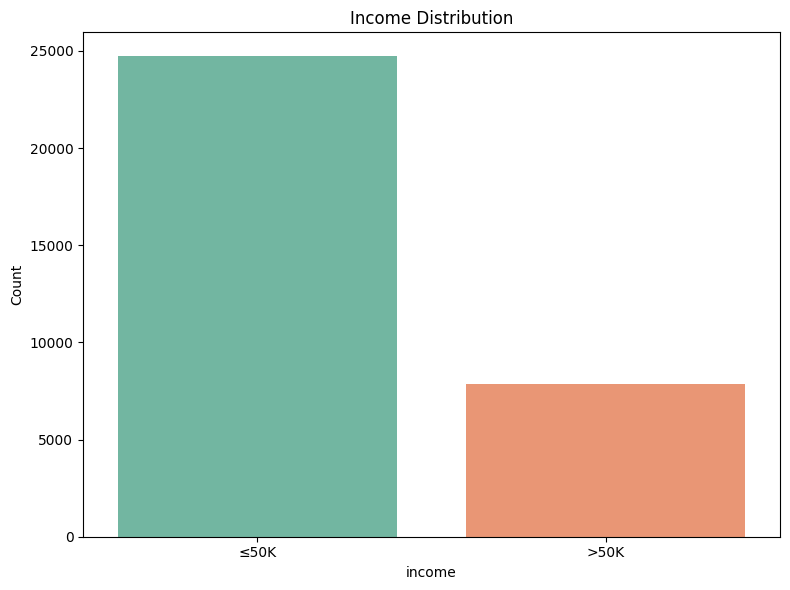

In [9]:
# 2) Income distribution (categorical)
plt.figure(figsize=(8,6))
sns.countplot(x=df['income'] , palette="Set2")
plt.title("Income Distribution")
plt.xlabel("income")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["≤50K", ">50K"])
plt.tight_layout()
plt.show()

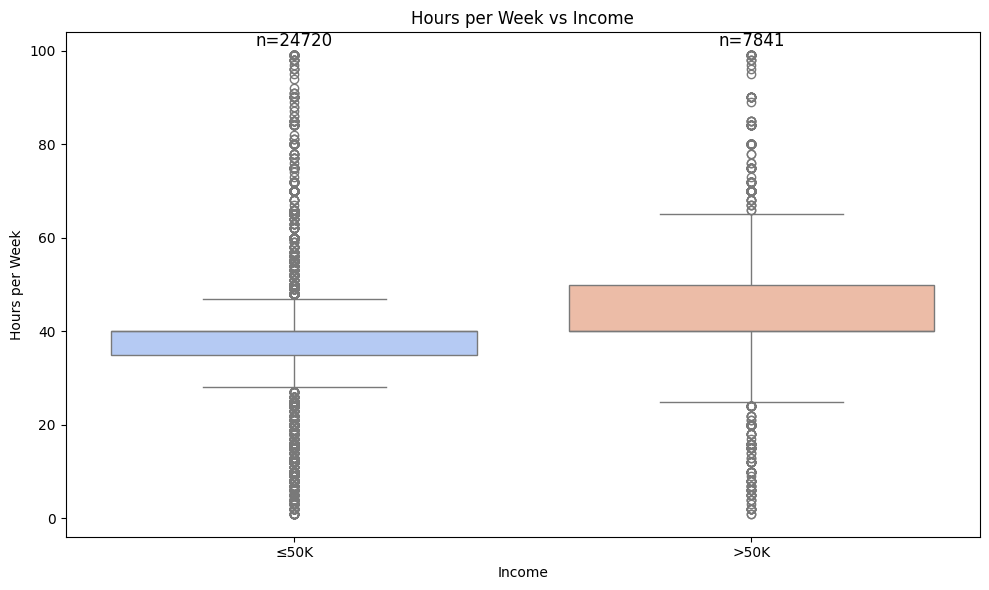

In [10]:
# 3) Hours per Week vs Income (boxplot)
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=df["income"], y=df["hours.per.week"], palette="coolwarm")
plt.title("Hours per Week vs Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")

# Calculate counts
counts = df['income'].value_counts()

# Add counts above boxes
for i, count in enumerate(counts):
    ax.text(i, df["hours.per.week"].max() + 2, f'n={count}',
            ha='center', fontsize=12, color='black')

plt.xticks(ticks=[0, 1], labels=["≤50K", ">50K"])
plt.tight_layout()
plt.show()



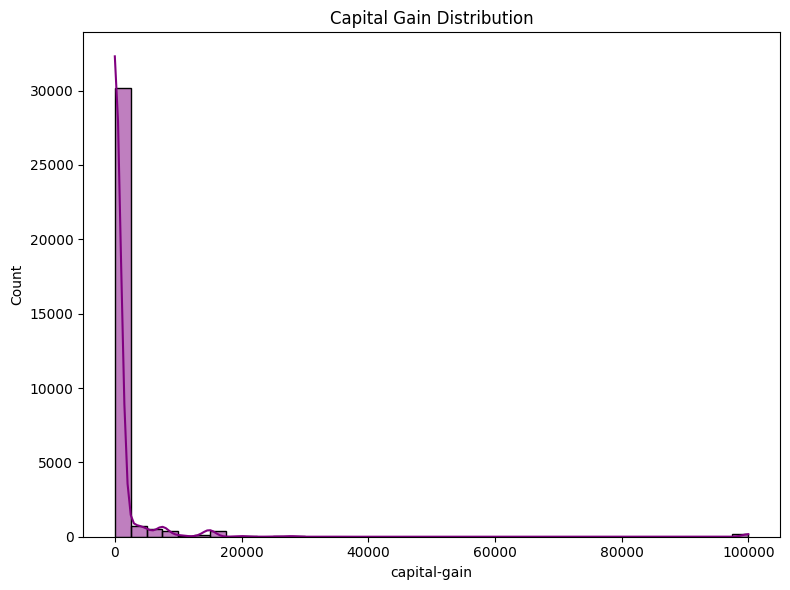

In [11]:
# 4) Capital Gain distribution
plt.figure(figsize=(8,6))
sns.histplot(df['capital.gain'], bins=40, kde=True, color="purple")
plt.title("Capital Gain Distribution")
plt.xlabel("capital-gain"); plt.ylabel("Count")
plt.tight_layout(); plt.show()



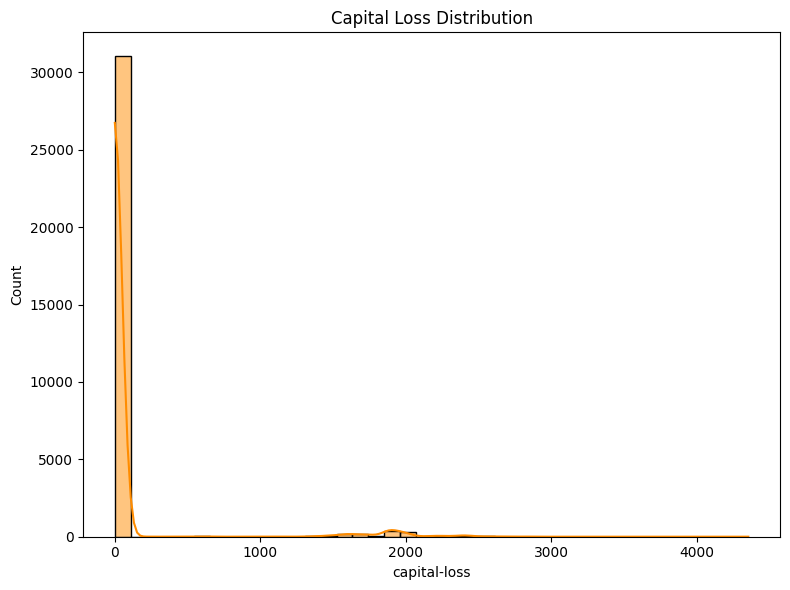

In [12]:
# 5) Capital Loss distribution
plt.figure(figsize=(8,6))
sns.histplot(df['capital.loss'], bins=40, kde=True, color="darkorange")
plt.title("Capital Loss Distribution")
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



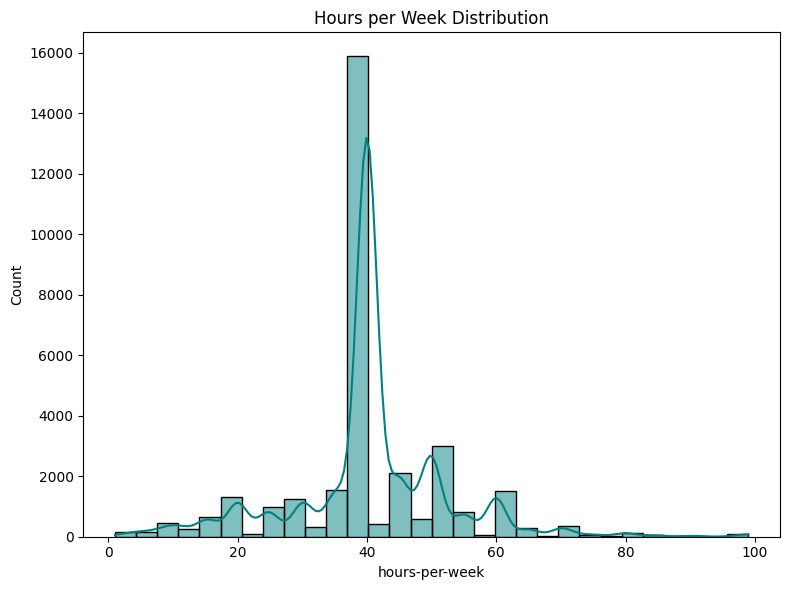

In [13]:
# 6) Hours per Week distribution (numeric)
plt.figure(figsize=(8,6))
sns.histplot(df['hours.per.week'], bins=30, kde=True, color="teal")
plt.title("Hours per Week Distribution")
plt.xlabel("hours-per-week"); plt.ylabel("Count")
plt.tight_layout(); plt.show()



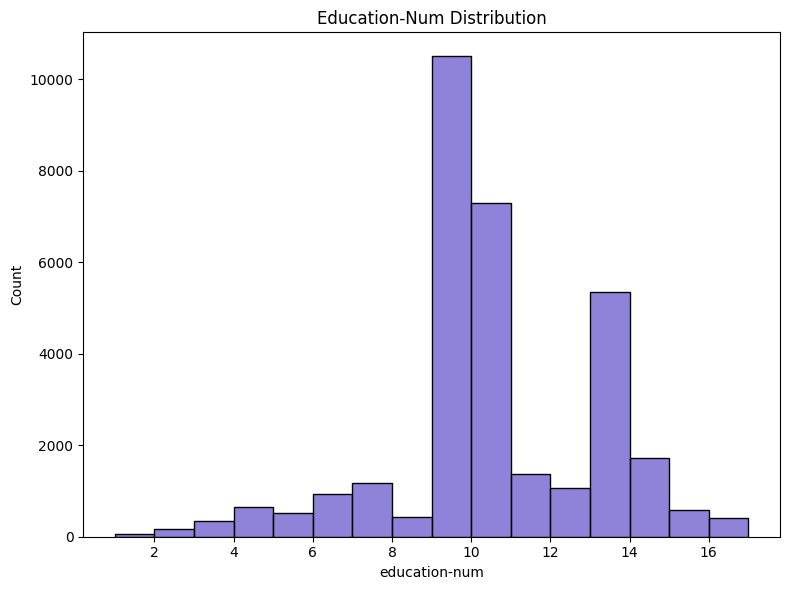

In [14]:
# 7) Education-num distribution
plt.figure(figsize=(8,6))
sns.histplot(df['education.num'], bins=range(int(df['education.num'].min()), int(df['education.num'].max())+2),
             kde=False, color="slateblue")
plt.title("Education-Num Distribution")
plt.xlabel("education-num"); plt.ylabel("Count")
plt.tight_layout(); plt.show()



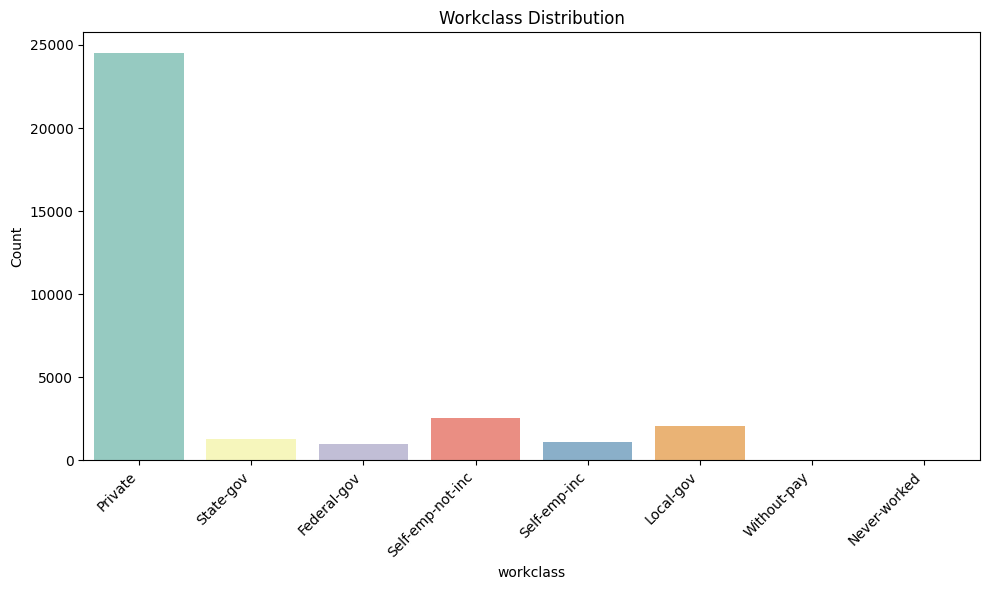

In [15]:
# 8) Workclass distribution
plt.figure(figsize=(10,6))
sns.countplot(x=df['workclass'], palette="Set3")
plt.title("Workclass Distribution")
plt.xlabel("workclass"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



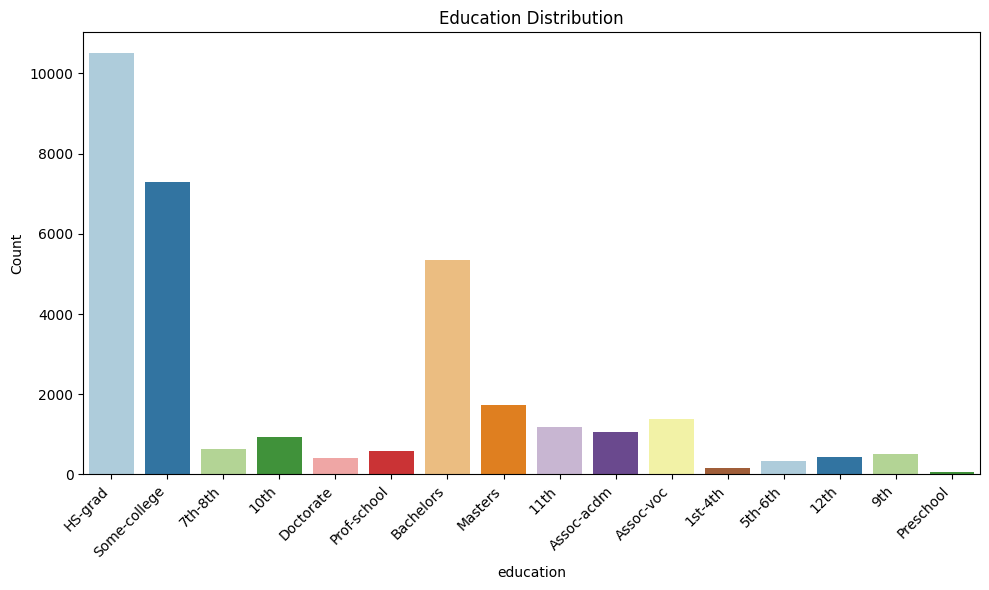

In [16]:
# 9) Education distribution (categorical)
plt.figure(figsize=(10,6))
sns.countplot(x=df['education'], palette="Paired")
plt.title("Education Distribution")
plt.xlabel("education"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



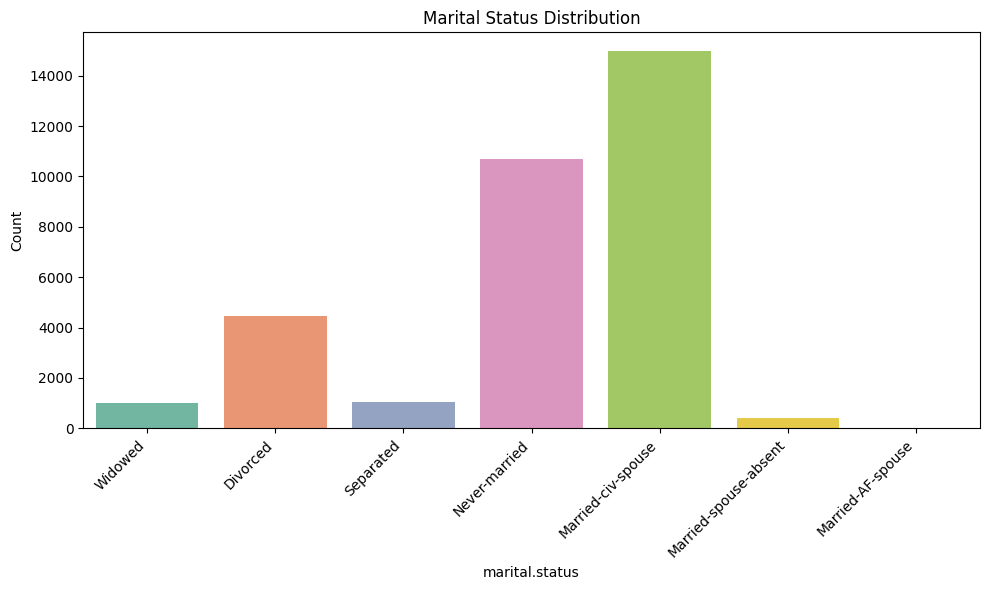

In [17]:
# 10) Marital Status distribution (categorical)
plt.figure(figsize=(10,6))
sns.countplot(x=df['marital.status'], palette="Set2")
plt.title("Marital Status Distribution")
plt.xlabel("marital.status"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



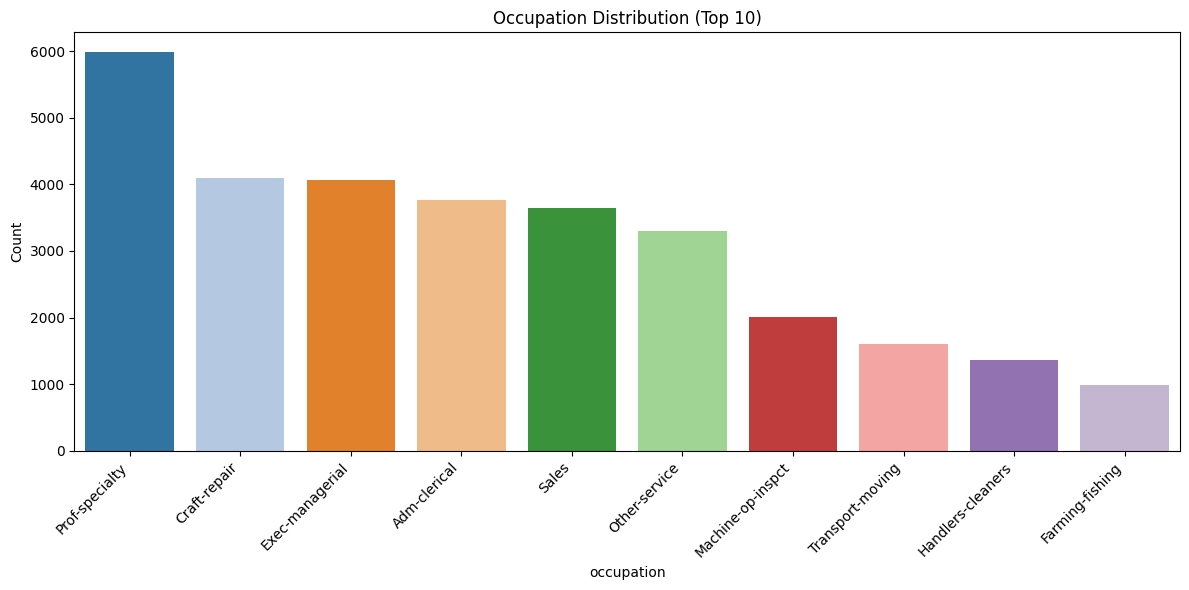

In [18]:
# 11) Occupation distribution
plt.figure(figsize=(12,6))
occ = df['occupation']
order = occ.value_counts().index[:10]
sns.countplot(x=occ, order=order, palette="tab20")
plt.title("Occupation Distribution (Top 10)")
plt.xlabel("occupation"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



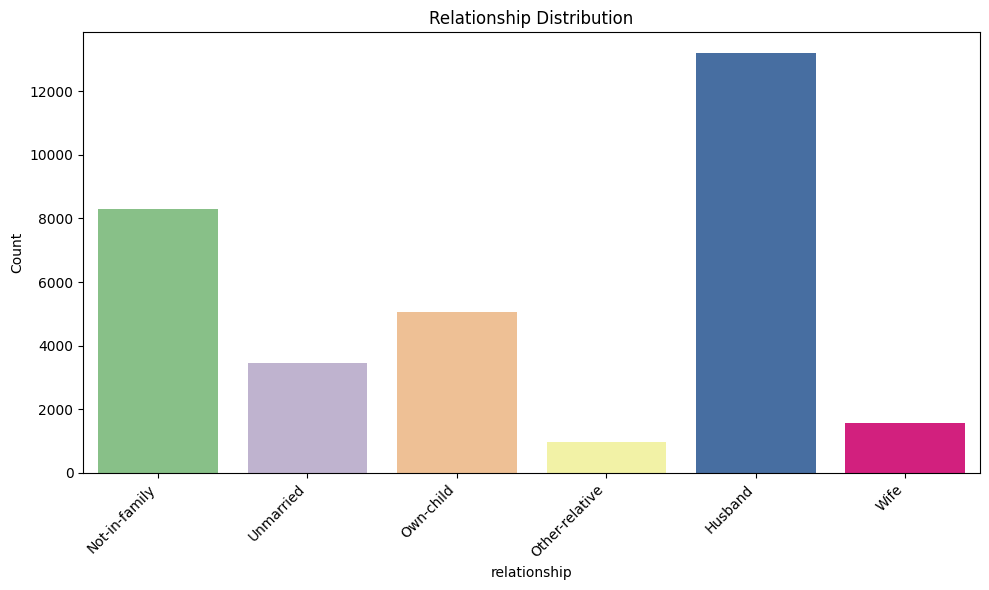

In [19]:
# 12) Relationship distribution (categorical)
plt.figure(figsize=(10,6))
sns.countplot(x=df['relationship'], palette="Accent")
plt.title("Relationship Distribution")
plt.xlabel("relationship"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



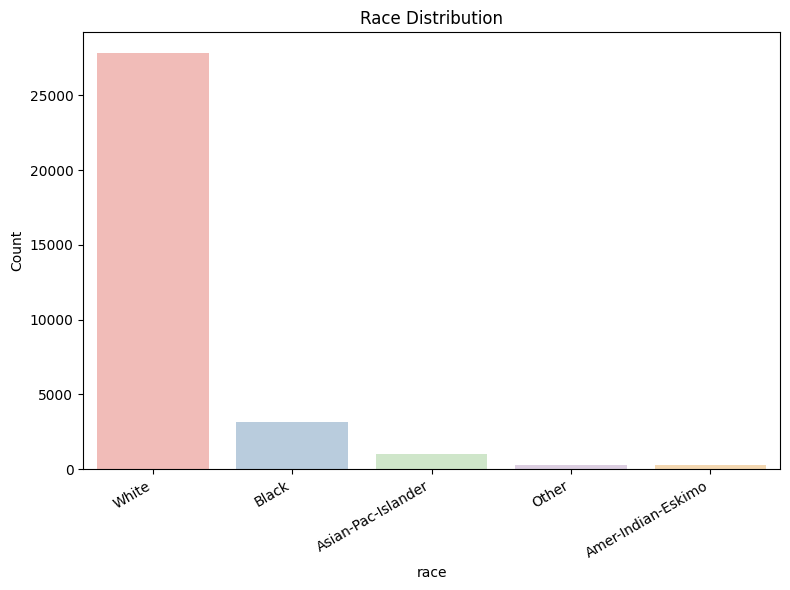

In [20]:
# 13) Race distribution (categorical)
plt.figure(figsize=(8,6))
sns.countplot(x=df['race'], palette="Pastel1")
plt.title("Race Distribution")
plt.xlabel("race"); plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout(); plt.show()



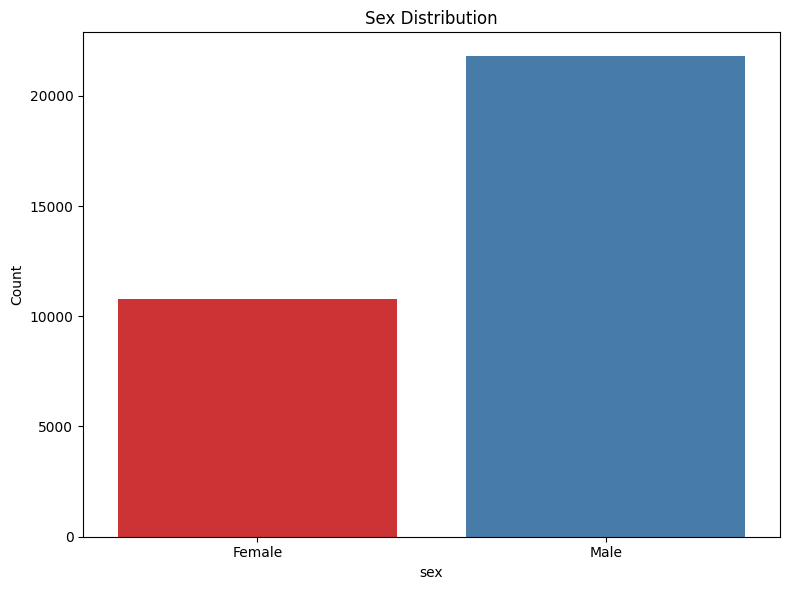

In [21]:
# 14) Sex distribution (categorical)
plt.figure(figsize=(8,6))
sns.countplot(x=df['sex'], palette="Set1")
plt.title("Sex Distribution")
plt.xlabel("sex"); plt.ylabel("Count")
plt.tight_layout(); plt.show()



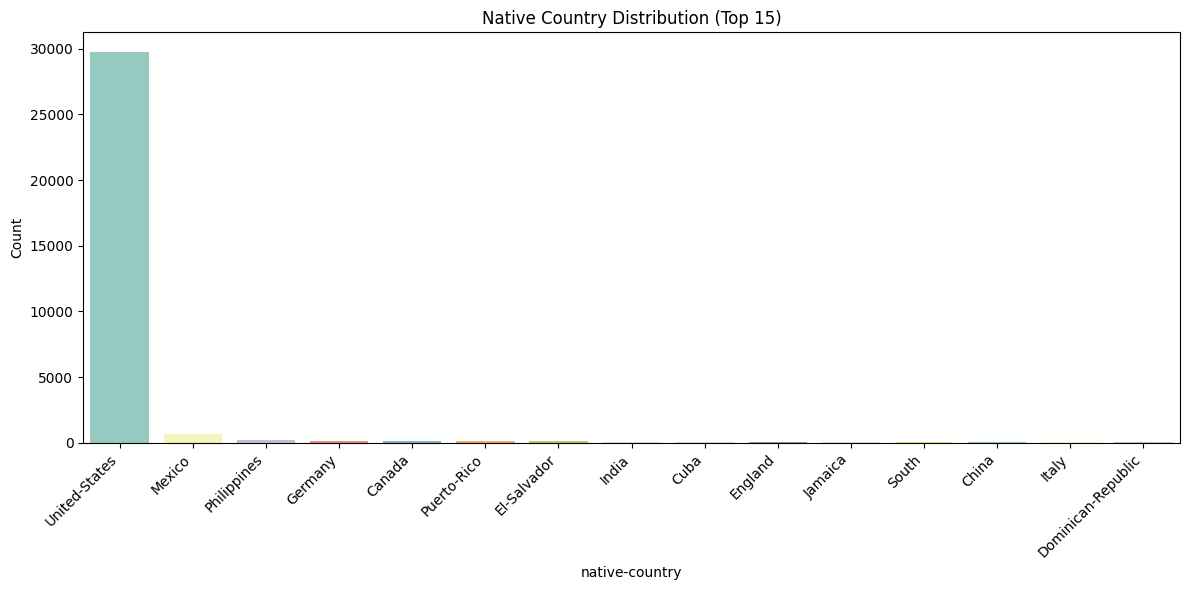

In [22]:
# 15) Native Country distribution (categorical, top 15)
plt.figure(figsize=(12,6))
country = df['native.country']
top_countries = country.value_counts().index[:15]
sns.countplot(x=country, order=top_countries, palette="Set3")
plt.title("Native Country Distribution (Top 15)")
plt.xlabel("native-country"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

Encoding is needed because ML models work with numbers, not text.
This loop applies label encoding to every categorical column and stores the encoders for consistent future transformations.

In [23]:
# Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Used descriptive analysis to get a summary view of the dataset’s main characteristics before doing deeper statistical analysis or building models.

In [24]:
# Descriptive Analysis
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                age     workclass        fnlwgt     education  education.num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      3.094438  1.897784e+05     10.298210      10.080679   
std       13.640433      1.107194  1.055500e+05      3.870264       2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      3.000000  1.178270e+05      9.000000       9.000000   
50%       37.000000      3.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      3.000000  2.370510e+05     12.000000      12.000000   
max       90.000000      7.000000  1.484705e+06     15.000000      16.000000   

       marital.status    occupation  relationship          race           sex  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         2.611836      6.138755      1.446362      3.665858      0.669205   
std        

Heatmap showing how numeric features relate to each other after encoding.
A correlation matrix is used to understand relationships, detect redundancy, and guide feature selection before building models.

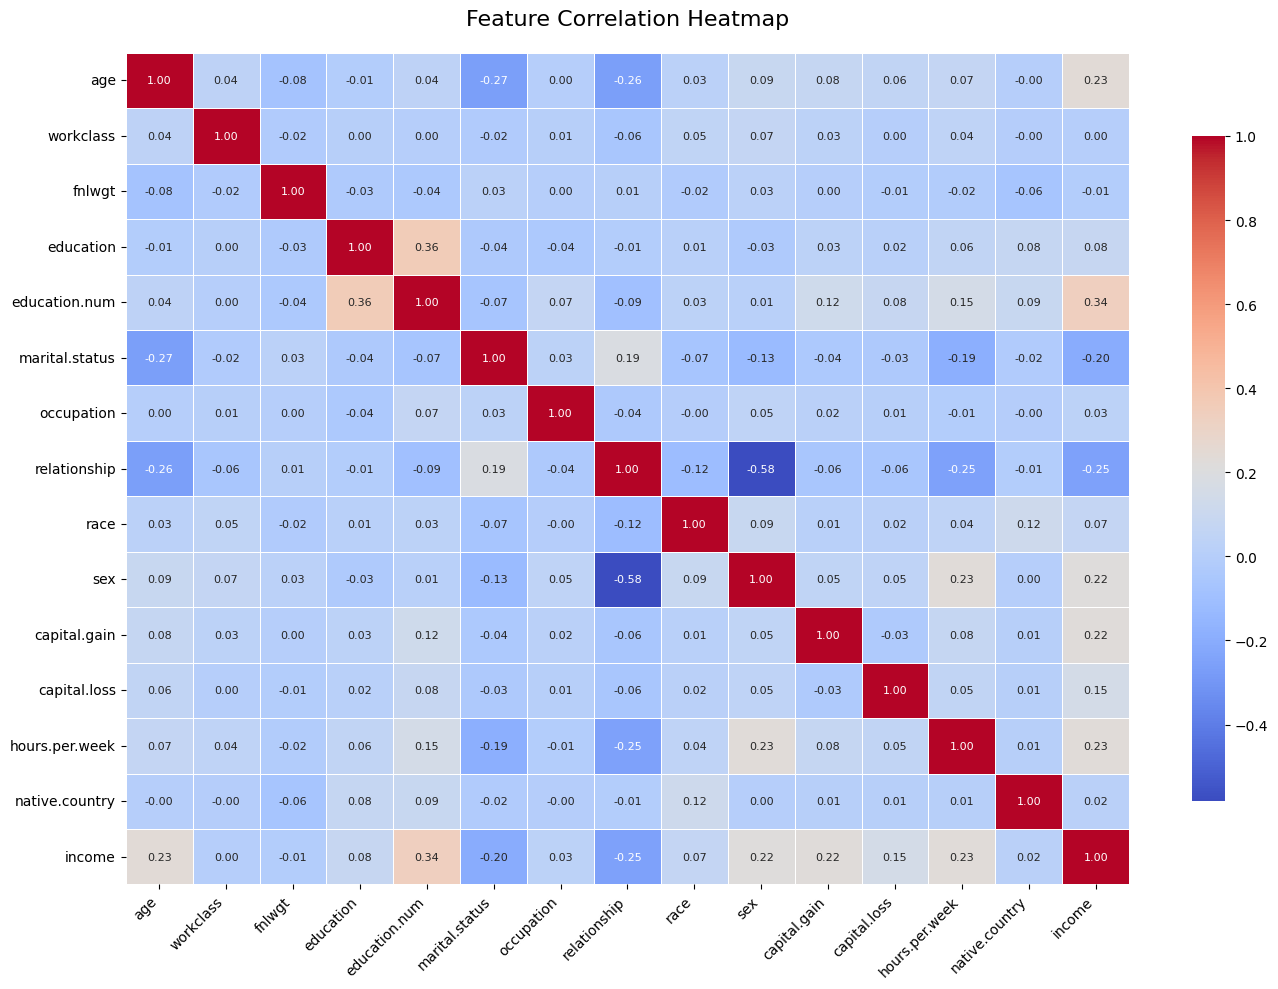

In [25]:
# Correlation Matrix
correlation_matrix = df.corr()

# Plot Improved Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            annot_kws={"size": 8},  # Smaller annotation text
            cbar_kws={'shrink': 0.8})  # Smaller color bar

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


Feature selection used to keep only the variables that are relevant for predicting the target, removing unnecessary or redundant data.
This helps improve model performance, reduce overfitting, and speed up computation.

In [26]:
# Feature Selection
X = df.drop("income", axis=1)
y = df["income"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Used normalize features to ensure all variables are on the same scale, preventing larger-valued features from dominating the model.
This improves training stability and performance for algorithms sensitive to feature magnitude, like SVMs and logistic regression.

In [27]:
# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train multiple models to compare their performance because no single algorithm works best for all datasets.
Selecting the most accurate model and evaluating it in detail ensures we choose the one that generalizes best and gives reliable predictions.


Model Performance:
Decision Tree: Accuracy = 0.8084
Random Forest: Accuracy = 0.8578
Gradient Boosting: Accuracy = 0.8643

Best Model Selected: GradientBoostingClassifier

Confusion Matrix:
[[4748  228]
 [ 656  881]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4976
           1       0.79      0.57      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.84      0.76      0.79      6513
weighted avg       0.86      0.86      0.86      6513



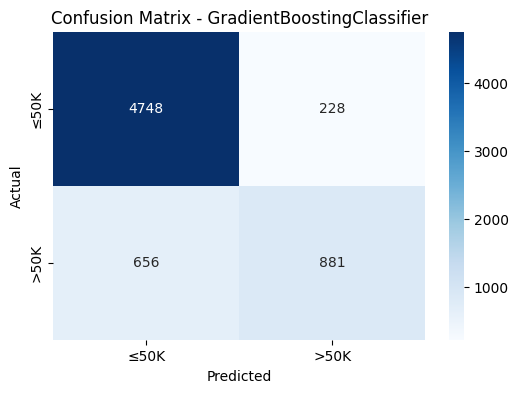

In [28]:
# Train Machine Learning Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
}

print("\nModel Performance:")
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

    # Track the best-performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Display Confusion Matrix for Best Model
print("\nBest Model Selected:", type(best_model).__name__)
y_pred_best = best_model.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Display Confusion Matrix as Heatmap
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["≤50K", ">50K"], yticklabels=["≤50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {type(best_model).__name__}")
plt.show()


Perform statistical analysis of feature importance to understand which variables most influence the model’s predictions.
This helps in interpreting the model, improving decision-making, and guiding future data collection or feature engineering.


Feature Importance:
           Feature  Importance
7     relationship    0.341463
10    capital.gain    0.224010
4    education.num    0.205433
0              age    0.065022
11    capital.loss    0.058507
12  hours.per.week    0.036658
5   marital.status    0.031252
6       occupation    0.021873
1        workclass    0.005377
9              sex    0.004909
2           fnlwgt    0.004363
8             race    0.000662
3        education    0.000255
13  native.country    0.000217


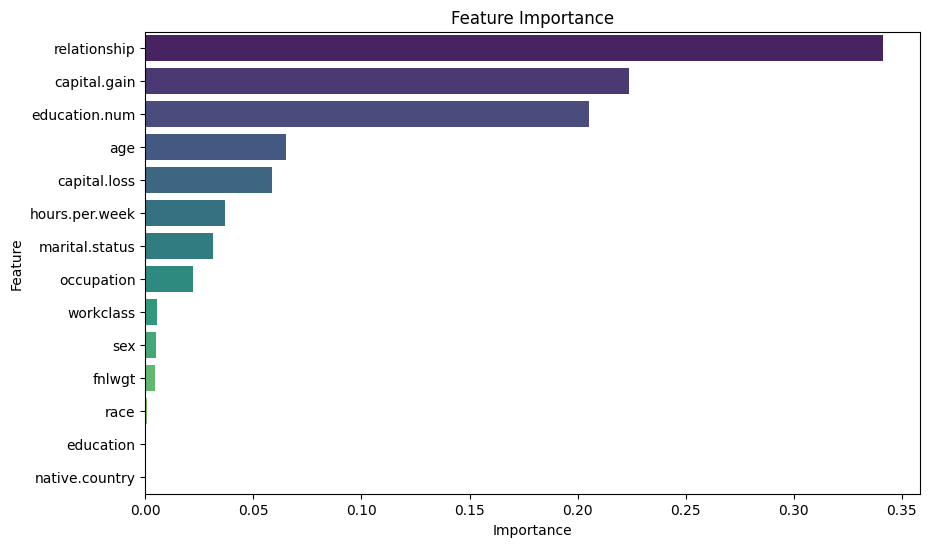

In [29]:
# Statistical Analysis - Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importances)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance")
plt.show()

In [30]:
# Predict Income for a New Person
def predict_income(new_data):
    # Convert dictionary to DataFrame
    new_df = pd.DataFrame([new_data])

    # Encode categorical variables
    for col in label_encoders:
        if col in new_df.columns:
            try:
                new_df[col] = label_encoders[col].transform(new_df[col])
            except ValueError:  # Handle unseen categories
                new_df[col] = -1  # Assign an unknown category label

    # Scale numerical features
    new_df_scaled = scaler.transform(new_df)

    # Predict Income
    prediction = best_model.predict(new_df_scaled)

    return "Income > $50K" if prediction[0] == 1 else "Income ≤ $50K"

# Example: Predicting Income for a New Individual
new_person = {
    "age": 35, "workclass": "Private", "fnlwgt": 150000, "education": "Bachelors",
    "education.num": 13, "marital.status": "Married.civ.spouse", "occupation": "Exec.managerial",
    "relationship": "Husband", "race": "White", "sex": "Male",
    "capital.gain": 5000, "capital.loss": 0, "hours.per.week": 40, "native.country": "United-States"
}

# Run the prediction
print("\nPrediction for new individual:", predict_income(new_person))



Prediction for new individual: Income ≤ $50K
